In [31]:
import pandas as pd
import numpy as np
import pyspark as spark
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf




In [6]:
base="/Users/gyanapradhan/Desktop/Datasets/"
df =pd.read_csv(base+ "all_stocks_5yr.csv")



In [12]:

company='AAPL'
data_comp   = df[df['Name']==company]
data_comp


,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
2513,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
2514,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
2515,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
2516,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [14]:
data_comp['date']= pd.to_datetime(data_comp['date'])

/Users/gyanapradhan/PycharmProjects/PythonProject/PythonProject1/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data_comp.set_index('date',inplace=True)

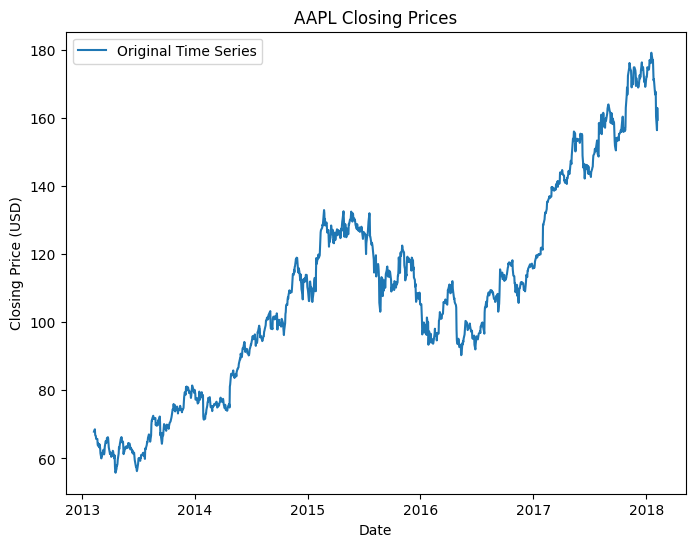

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(data_comp['close'], label='Original Time Series')
plt.title(f'{company} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [25]:
data_comp['log_close']=np.log(data_comp['close'])
data_comp['diff_close']= data_comp['close'].diff()
data_comp['log_diff_close']=data_comp['log_close'].diff(0)

/Users/gyanapradhan/PycharmProjects/PythonProject/PythonProject1/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/gyanapradhan/PycharmProjects/PythonProject/PythonProject1/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/gyanapradhan/PycharmProjects/PythonProject/PythonProject1/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3:

In [26]:
data_comp

,open,high,low,close,volume,Name,log_close,diff_close,log_diff_close
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,4.217361,NaN,0.0
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,4.227730,0.7072,0.0
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,4.202344,-1.7186,0.0
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,4.200439,-0.1272,0.0
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,4.199539,-0.0600,0.0
...,...,...,...,...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,5.122654,0.3500,0.0
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,5.078294,-7.2800,0.0
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,5.052992,-4.0100,0.0


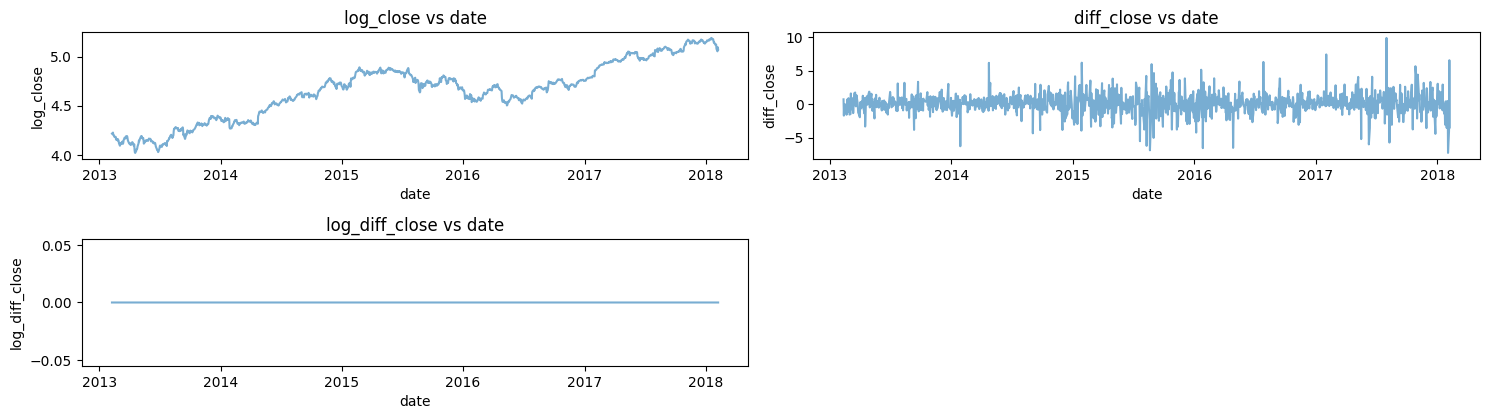

In [37]:
featured_cols=['log_close','diff_close','log_diff_close']
plt.figure(figsize=(15,8))

for i,col in enumerate (featured_cols):
    plt.subplot(4,2,i+1)
    sns.lineplot(data=data_comp,x='date', y=col,alpha=0.6)
    plt.title(f"{col} vs {'date'}")
    plt.xlabel('date')
    plt.ylabel(col)


plt.tight_layout()
plt.show()

In [56]:
data_comp.fillna('median',inplace=True)
residue = np.where(data_comp['close'].isna())
print(residue)
#print(adfuller(data_comp['close']))



(array([], dtype=int64),)


/Users/gyanapradhan/PycharmProjects/PythonProject/PythonProject1/.venv/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [50]:
def ad_fuller(series):
    result=adfuller(series)
    print(f'p-value: {result[1]}')
    if result[1] <.05:
        print("Conclusion: The series is stationary (Reject H0).")
    else:
        print("Conclusion: The series is non-stationary (Fail to reject H0).")
    print('\n')


In [57]:
ad_fuller(data_comp['close'])
ad_fuller(data_comp['log_close'])

ad_fuller(data_comp['log_diff_close'])

p-value: 0.8555858445838954
Conclusion: The series is non-stationary (Fail to reject H0).


p-value: 0.7777486550641598
Conclusion: The series is non-stationary (Fail to reject H0).


p-value: nan
Conclusion: The series is non-stationary (Fail to reject H0).




/Users/gyanapradhan/PycharmProjects/PythonProject/PythonProject1/.venv/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [58]:
def kpss_test(series, title):
        print(f'--- {title} ---')
        result = kpss(series, regression='c', nlags="auto")
        print(f'p-value: {result[1]}')
        if result[1] < 0.05:
            print("Conclusion: The series is not stationary (Reject H0).")
        else:
            print("Conclusion: The series is stationary (Fail to reject H0).")
        print('\n')

In [59]:
kpss_test(data_comp['close'],"KPSS Test")

--- KPSS Test ---
p-value: 0.01
Conclusion: The series is not stationary (Reject H0).




/Users/gyanapradhan/PycharmProjects/PythonProject/PythonProject1/.venv/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


ValueError: could not convert string to float: 'mean'

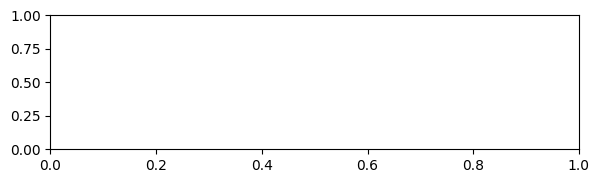

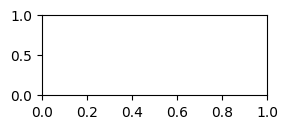

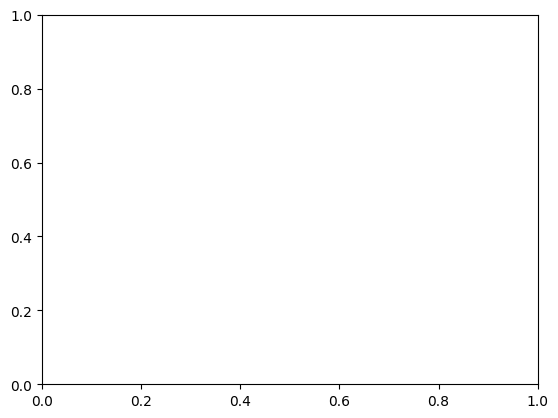

In [80]:
# Plot ACF and PACF for the Original Series
featured_cols=['log_close','diff_close','log_diff_close']
plt.figure(figsize=(15,8))

for i,col in enumerate(featured_cols):
    plt.subplot(4, 2,i+1)
    plot_acf(data_comp[col], title=f"{col} price")
    #plt.title(f"{col} price")

plt.tight_layout()
plt.show()




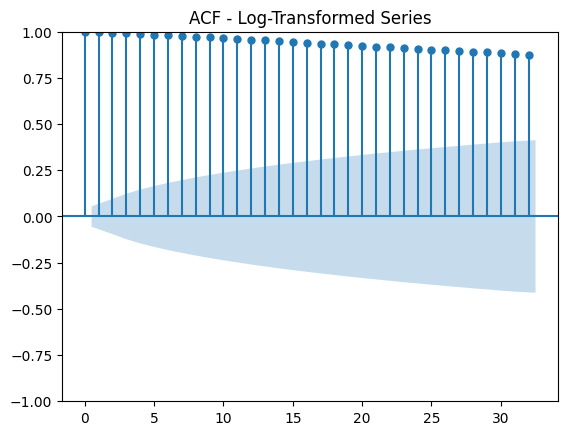

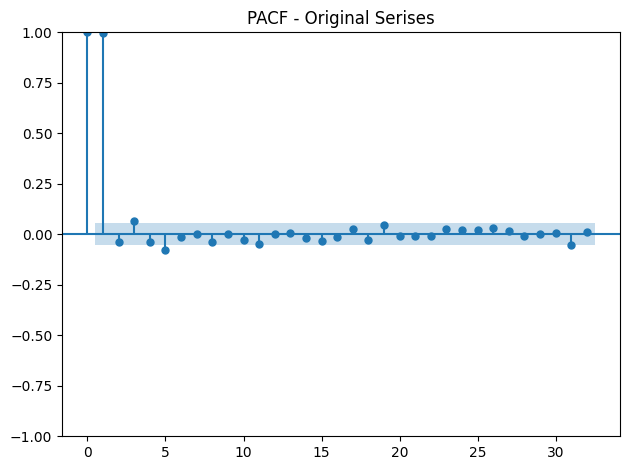

In [89]:
#fig, axes = plt.subplots(1, 1, figsize=(10, 14))
plot_acf(data_comp['close'], title="ACF - Log-Transformed Series")
plot_pacf(data_comp['close'], title="PACF - Original Serises")
plt.tight_layout()
plt.show()